# An analysis of the Anscombes Quartet Dataset

### Task 1 (of 4) - Background to the dataset – who created it, when it was created, and any speculation you can find regarding how it might have been created

### Task 2 (of 4) - Plot the interesting aspects of the dataset

### Task 3 (of 4) - Calculate the descriptive statistics of the variables in the dataset

### Task 4 (of 4) - why the dataset is interesting, referring to the plots and statistics above

# Simple Linear Regression with NumPy

In school, students are taught to draw lines like the following :       y = 2 x + 1

They're taught to pick two values for x and calculate the corresponding values for y using the equation. Then they draw a set of axes, plot the points, and then draw a line extending through the two dots on their axes.

In [1]:
import matplotlib.pyplot as plt

# Draw some axes.
plt.plot([-1, 10], [0, 0], 'k-')
plt.plot([0, 0], [-1, 10], 'k-')

# Plot the red, blue and green lines.
plt.plot([1, 1], [-1, 3], 'b:')
plt.plot([-1, 1], [3, 3], 'r:')
 
# Plot the two points (1,3) and (2,5).
plt.plot([1, 2], [3, 5], 'ko')
# Join them with an (extending) green lines.
plt.plot([-1, 10], [-1, 21], 'g-')
    
# Set some reasonable plot limits.
plt.xlim([-1, 10])
plt.ylim([-1, 10])

# Show the plot.
plt.show()

<Figure size 640x480 with 1 Axes>

But Simple linear regression is about the opposite problem - what if you have some points and are looking for the equation? It's easy when the points are perfectly on a line already, but usually real-world data has some noise. The data might still look roughly linear, but aren't exactly so.

## Example (contrived and simulated)

Suppose you are trying to weigh your suitcase to avoid an airline's extra charges. You don't have a weighing scales, but you do have a spring and some gym-style weights of masses 7KG, 14KG and 21KG.

You attach the spring to the wall hook, and mark where the bottom of it hangs. You then hang the 7KG weight on the end and mark where the bottom of the spring is. You repeat this with the 14KG weight and the 21KG weight. Finally, you place your case hanging on the spring, and the spring hangs down halfway between the 7KG mark and the 14KG mark.

Is your case over the 10KG limit set by the airline?"


#### Hypothesis
When you look at the marks on the wall, it seems that the 0KG, 7KG, 14KG and 21KG marks are evenly spaced. You wonder if that means your case weighs 10.5KG.

That is, you wonder if there is a *linear* relationship between the distance the spring's hook is from its resting position, and the mass on the end of it.

#### Experiment
You decide to experiment. You buy some new weights - a 1KG, a 2KG, a 3Kg, all the way up to 20KG. You place them each in turn on the spring and measure the distance the spring moves from the resting position. You tabulate the data and plot them.

#### Analysis
Here we'll import the Python libraries we need for or investigations below.
   

In [2]:
# Make matplotlib show interactive plots in the notebook.
%matplotlib inline

In [3]:
# numpy efficiently deals with numerical multi-dimensional arrays.\n",
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.\n",
import matplotlib.pyplot as plt

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (8, 6)


Ignore the next couple of lines where I fake up some data. I'll use the fact that I faked the data to explain some results later. Just pretend that w is an array containing the weight values and d are the corresponding distance measurements.

In [4]:
w = np.arange(0.0, 21.0, 1.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)

In [5]:
#lets have a look at w
w

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [6]:
#lets have a look at d
d

array([  6.50965532,  12.61867057,  12.70448453,  28.64620364,
        36.69787852,  35.11264971,  35.56154607,  52.27580676,
        38.03741095,  56.48262444,  60.22650117,  58.73010486,
        67.23855363,  79.00553095,  77.9716725 ,  90.89256718,
        91.71968633,  94.13798868,  91.75919275, 102.78733319,
       106.12010544])

#### lets have a look at the data from our experiment

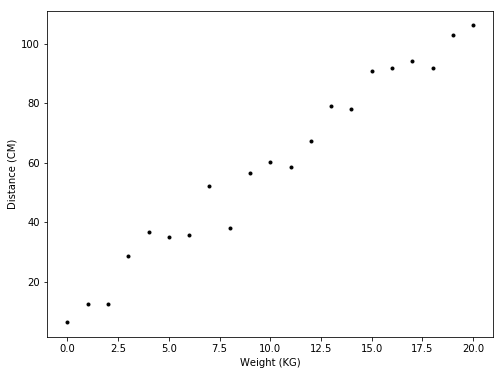

In [7]:
#Create the plot.

plt.plot(w, d, 'k.')
 
# Set some properties for the plot.\n",
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()


#### Model
It looks like the data might indeed be linear. The points don't exactly fit on a straight line, but they are not far off it. We might put that down to some other factors, such as the air density, or errors, such as in our tape measure.  Then we can go ahead and see what would be the best line to fit the data.


#### Straight lines\n",
All straight lines can be expressed in the form y = mx + c. The number m is the slope of the line. The slope is how much y increases by when x is increased by 1.0.

The number c is the y-intercept of the line. It's the value of $y$ when $x$ is 0.

#### Fitting the model

To fit a straight line to the data, we just must pick values for m and c.These are called the parameters of the model,and we want to pick the best values possible for the parameters. That is, the best parameter values *given* the data observed. Below we show various lines plotted over the data, with different values for m and c.

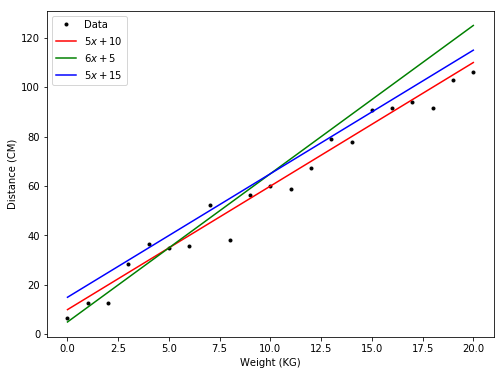

In [14]:
# Plot w versus d with black dots.
plt.plot(w, d, 'k.', label="Data")
# Overlay some lines on the plot.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, 5.0 * x + 10.0, 'r-', label=r"$5x + 10$")
plt.plot(x, 6.0 * x +  5.0, 'g-', label=r"$6x +  5$")
plt.plot(x, 5.0 * x + 15.0, 'b-', label=r"$5x + 15$")
    
# Add a legend.
plt.legend()
    
# Add axis labels.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()